In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_img = X_train[0]

In [6]:
single_img.shape

(28, 28)

In [7]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

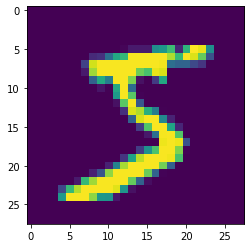

In [9]:
plt.imshow(single_img) # 5

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,num_classes=10)  # needn't to specify 10 here coz our y_test and y_train contains instances of each
                                                    # each possible class which we expect

In [17]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [18]:
X_train = X_train/255

In [19]:
X_test = X_test/255

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
# batch_size,width,height,color_channel
X_train = X_train.reshape(60000,28,28,1)

In [22]:
X_test = X_test.reshape(10000,28,28,1)

In [23]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # to convert the activation of last conv layer to feature matrix X

model.add(Dense(128,activation='relu'))

# OUTPUT LAYER SOFTMAX--> multiclass prob
model.add(Dense(10,activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
# input_shape and (neurons,actiavtion in last layer and loss)is fixed and is determined by our data n we can play with
# rest of the hyperparameters but usually for such tasks the no. of dense layers are not too many coz many of the tasks are 
# done by the conv and pooling layers

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=1) # could also monitor val_accuracy as we added this metrix

In [29]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1348 - acc: 0.9597 - val_loss: 0.0501 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0472 - acc: 0.9855 - val_loss: 0.0431 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0299 - acc: 0.9903 - val_loss: 0.0388 - val_acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0445 - val_acc: 0.9854


In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,acc,val_loss,val_acc
0,0.134790,0.959683,0.050054,0.9847
1,0.047152,0.985467,0.043129,0.9854
2,0.029948,0.990283,0.038769,0.9869
3,0.019557,0.993817,0.044503,0.9854


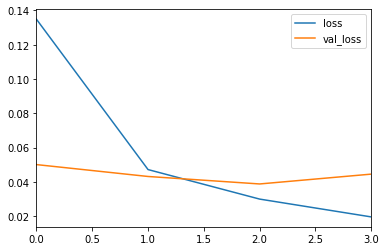

In [32]:
metrics[['loss','val_loss']].plot()

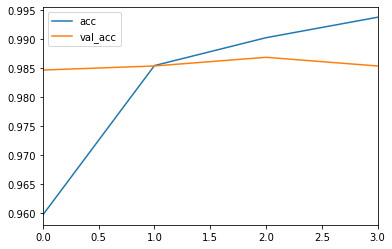

In [33]:
metrics[['acc','val_acc']].plot()

In [34]:
model.metrics_names

['loss', 'acc']

In [35]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04450263540839078, 0.9854]

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
y_cat_test.shape

(10000, 10)

In [39]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       1.00      0.94      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
print(confusion_matrix(y_test,predictions))

[[ 975    0    2    0    0    1    0    1    1    0]
 [   0 1129    2    0    1    0    2    1    0    0]
 [   1    0 1024    0    1    0    1    5    0    0]
 [   0    0    4  998    0    3    0    2    3    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   2    0    0    6    0  883    1    0    0    0]
 [   3    2    1    0    4    7  938    0    3    0]
 [   0    0    6    0    1    0    0 1019    1    1]
 [   2    0    3    0    4    2    0    3  959    1]
 [   1    0    0    3   24   12    0   12    9  948]]


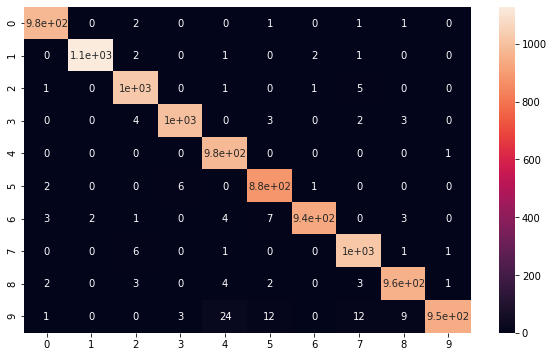

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [45]:
my_num = X_test[0]

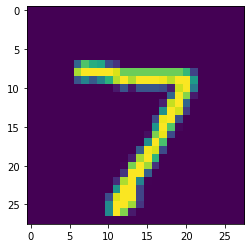

In [46]:
plt.imshow(my_num.reshape(28,28))

In [47]:
# num_images,width,height,color_channels
model.predict_classes(my_num.reshape(1,28,28,1))

array([7], dtype=int64)

In [48]:
# hurrey!!